<a href="https://colab.research.google.com/github/DaverArenas/DataAnalytics_Text/blob/main/An%C3%A1lisisReformaTributaria_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Reforma Tributaria 2022

# Trabajo 3 - Analítica de Datos para BD-BI
Nombres de los integrantes del grupo:   
 
*   Daverson Arenas
*   Camilo Gómez
*   Juan Carlos Guerrero
 
Universidad EIA   
2022


##Contexto

Se selecciona como temática de investigación la reforma tributaria planteada en 2021 por parte del gobierno de Ivan Duque y la actual que está siendo discutida en el gobierno de Gustavo Petro. 

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
from datetime import date

In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np
import re
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import date

## Extraer tweets REFORMA TRIBUTARIA GOBIERNO PETRO##

In [ ]:
import snscrape.modules.twitter as sntwitter
import itertools
import os
import pandas as pd
from datetime import date

In [ ]:
from_date = '2022-01-01'
end_date = date.today()
search='reforma tributaria:es since:"{}" until:"{}"'.format(from_date,end_date)

In [ ]:
df_2 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(search).get_items(), 3000))
df_2

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 21:37:41+00:00,@wilsonariasc Pero si la nueva reforma tributa...,1556031784583921668,pangel1960,[],,[],
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 18:23:46+00:00,@futbolsur11 @Canilemo @_alvaromunoz Estimado:...,1555982983286312960,Denise_Retamal,[],,[],
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 14:07:15+00:00,"🤔 Para aprobar la Reforma Tributaria, es impor...",1555918429852274688,m_s_e_r,[https://twitter.com/latercera/status/15559040...,https://twitter.com/latercera/status/155590401...,[https://t.co/sWD5ZK44Is],https://t.co/sWD5ZK44Is
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 13:36:17+00:00,@juanfcosanchezs Reforma tributaria es deficie...,1555910635501678592,FDuber,[],,[],
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 10:43:44+00:00,@lcvelez La reforma tributaria es para los que...,1555867210991763457,EduardoDvila12,[],,[],
...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 20:21:21+00:00,@Francis60220940 @Mafalda_2020_ Que estupidez....,1478099180816109573,edrova25,[],,[],
2052,https://twitter.com/PequeFran/status/147804187...,2022-01-03 16:33:38+00:00,@r_echecopar @cristobalotero lo que me parece ...,1478041875047137287,PequeFran,[],,[],
2053,https://twitter.com/carlossGD/status/147801671...,2022-01-03 14:53:39+00:00,@michelonater @anvolea4 Eso es solo al princip...,1478016713027244034,carlossGD,[],,[],
2054,https://twitter.com/ferchoprr/status/147800083...,2022-01-03 13:50:33+00:00,@elheraldoco @IvanDuque Si no hubiéramos tenid...,1478000833874829312,ferchoprr,[],,[],


In [ ]:
len(df_2)

2056

In [ ]:
##Convertimos la fecha a la hora local
df_2.date = df_2.date.dt.tz_convert('America/Bogota')

In [ ]:
min(df_2.date)

Timestamp('2022-01-01 18:32:29-0500', tz='America/Bogota')

In [ ]:
path='/content/drive/MyDrive/EIA/Analítica de Datos para BD-BI/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df_2.to_csv(path+'Reforma_Tributaria_2022.csv', encoding='utf-8-sig')

##Cargar los datos de un CSV

In [ ]:
df=pd.read_csv(path+'Reforma_Tributaria_2022.csv', encoding='utf-8-sig')

In [ ]:
df.head(10)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,@wilsonariasc Pero si la nueva reforma tributa...,1556031784583921668,pangel1960,[],NaN,[],NaN
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,@futbolsur11 @Canilemo @_alvaromunoz Estimado:...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,"🤔 Para aprobar la Reforma Tributaria, es impor...",1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,@juanfcosanchezs Reforma tributaria es deficie...,1555910635501678592,FDuber,[],NaN,[],NaN
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,@lcvelez La reforma tributaria es para los que...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN
5,5,https://twitter.com/Marlon11030320/status/1555...,2022-08-06 03:42:46-05:00,@lcvelez La nueva reforma tributaria es para q...,1555836768343261184,Marlon11030320,[],NaN,[],NaN
6,6,https://twitter.com/Arnoldo64374872/status/155...,2022-08-05 21:00:55-05:00,@lcvelez el problema de Colombia es que su sit...,1555735641010348033,Arnoldo64374872,[],NaN,[],NaN
7,7,https://twitter.com/Luis_H_Rubio/status/155571...,2022-08-05 19:39:50-05:00,@scarperez39 @IvanDuque Olla raspada con más d...,1555715234521915392,Luis_H_Rubio,[],NaN,[],NaN
8,8,https://twitter.com/Acostauba5814/status/15557...,2022-08-05 19:30:51-05:00,@jaimepumarejo @caordosgoitia @AlcaldiaCTG @Vi...,1555712975239094275,Acostauba5814,['http://Vo.Bo'],http://Vo.Bo,['https://t.co/KxwWuVZOSn'],https://t.co/KxwWuVZOSn
9,9,https://twitter.com/DaphneLack/status/15556983...,2022-08-05 18:32:42-05:00,Una buena propuesta de Reforma Tributaria es a...,1555698341723312130,DaphneLack,['https://ellibero.cl/opinion/patricio-arrau-r...,https://ellibero.cl/opinion/patricio-arrau-ref...,['https://t.co/VFHFMuoBnO'],https://t.co/VFHFMuoBnO


## WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df.content

0       @wilsonariasc Pero si la nueva reforma tributa...
1       @futbolsur11 @Canilemo @_alvaromunoz Estimado:...
2       🤔 Para aprobar la Reforma Tributaria, es impor...
3       @juanfcosanchezs Reforma tributaria es deficie...
4       @lcvelez La reforma tributaria es para los que...
                              ...                        
2051    @Francis60220940 @Mafalda_2020_ Que estupidez....
2052    @r_echecopar @cristobalotero lo que me parece ...
2053    @michelonater @anvolea4 Eso es solo al princip...
2054    @elheraldoco @IvanDuque Si no hubiéramos tenid...
2055    UNA MENTIROSA DE MIERDA Y CORRUPTA¡¡\nCOMO SIE...
Name: content, Length: 2056, dtype: object

In [ ]:
text = ' '.join(txt for txt in df.content)
len(text)

437922

(-0.5, 399.5, 199.5, -0.5)

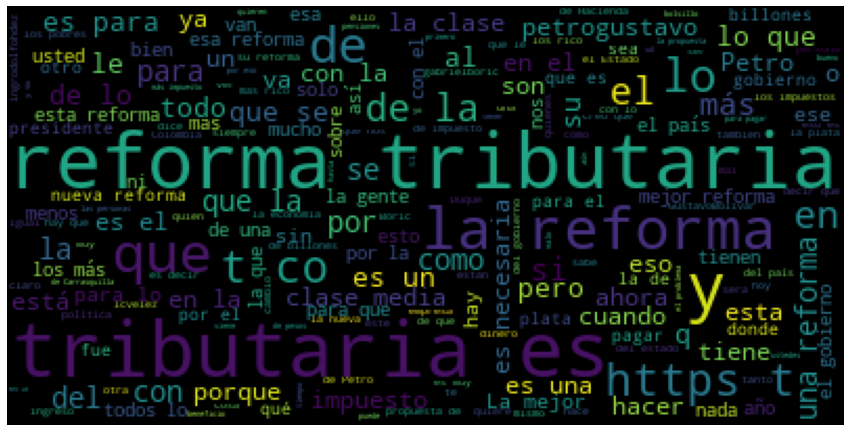

In [ ]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

##FRECUENCIA DE LAS PALABRAS

In [ ]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
reforma tributaria,1.000000
tributaria es,0.991321
y,0.684185
la reforma,0.562681
que,0.510125
...,...
y su,0.014947
quieren,0.014465
tener,0.014465
pensiones,0.014465


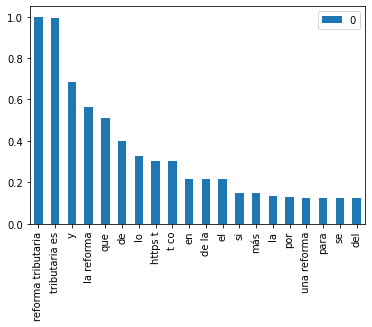

In [ ]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

##CONTANDO PALABRAS

In [ ]:
words_in_tweet =text.lower().split()

In [ ]:
counts_words = collections.Counter(words_in_tweet)
words_top=counts_words.most_common(10)
words, freqs = zip(*counts_words.most_common()[:10])
for w,q in zip(words, freqs):
  print(w,'\t',q)

la 	 3127
es 	 2845
de 	 2720
que 	 2423
reforma 	 2192
tributaria 	 1684
y 	 1589
el 	 1479
a 	 1429
los 	 1145


In [ ]:
counts_words.most_common()

[('la', 3127),
 ('es', 2845),
 ('de', 2720),
 ('que', 2423),
 ('reforma', 2192),
 ('tributaria', 1684),
 ('y', 1589),
 ('el', 1479),
 ('a', 1429),
 ('los', 1145),
 ('no', 1062),
 ('para', 924),
 ('en', 921),
 ('se', 667),
 ('una', 631),
 ('lo', 583),
 ('un', 579),
 ('más', 545),
 ('con', 519),
 ('del', 484),
 ('por', 477),
 ('las', 407),
 ('al', 322),
 ('si', 321),
 ('su', 251),
 ('como', 246),
 ('pero', 238),
 ('tributaria,', 227),
 ('q', 198),
 ('le', 185),
 ('impuestos', 184),
 ('gobierno', 175),
 ('eso', 163),
 ('@petrogustavo', 162),
 ('o', 153),
 ('esta', 146),
 ('ya', 143),
 ('porque', 139),
 ('está', 135),
 ('clase', 134),
 ('esa', 133),
 ('país', 131),
 ('petro', 130),
 ('son', 127),
 ('hay', 125),
 ('este', 125),
 ('nos', 124),
 ('todos', 123),
 ('va', 123),
 ('mejor', 122),
 ('hacer', 119),
 ('sus', 117),
 ('pagar', 116),
 ('tiene', 113),
 ('todo', 113),
 ('solo', 111),
 ('van', 101),
 ('muy', 100),
 ('sin', 97),
 ('ahora', 97),
 ('cuando', 94),
 ('tributaria.', 93),
 ('sobr

<BarContainer object of 10 artists>

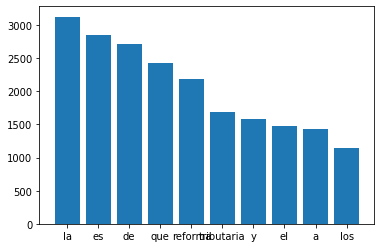

In [ ]:
plt.bar(list(words), list(freqs))

In [ ]:
##Creamos una nueva columna con las menciones que encontró en el twiter o 'content' 
df['mentions'] = df['content'].apply(lambda x: re.findall('@\w+', x))

In [ ]:
##Creamos una nueva columna con los hashtags que encontró en el twiter o 'content' 
df['hashtag'] = df['content'].apply(lambda x: re.findall('#\w+', x))

In [ ]:
df.head(5)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,@wilsonariasc Pero si la nueva reforma tributa...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[]
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,@futbolsur11 @Canilemo @_alvaromunoz Estimado:...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[]
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,"🤔 Para aprobar la Reforma Tributaria, es impor...",1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[]
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,@juanfcosanchezs Reforma tributaria es deficie...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[]
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,@lcvelez La reforma tributaria es para los que...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[]


In [ ]:
screen_names = set(df.mentions.sum())
screen_names

{'@PsicClemente',
 '@Danielbricen',
 '@ladytron26',
 '@constanza_sara',
 '@mafesv11',
 '@SebastianNohra',
 '@karlos2602',
 '@Soy_Botman_',
 '@caracolguaviare',
 '@cristobalotero',
 '@Nico_Barrera_G',
 '@michelonater',
 '@muchotropico',
 '@GattiIgnacio',
 '@DFinanciero',
 '@latercera',
 '@UNGRD',
 '@MEF_Peru',
 '@FEFecuador',
 '@AlejoToroAnt',
 '@NoticiasRCN',
 '@JuanManSantos',
 '@PichinchaGob',
 '@valenzuelalevi',
 '@CRValpo',
 '@ShereKhan900',
 '@rodrigojerezm',
 '@Danisandovalp',
 '@Fernando082074',
 '@glomago2012',
 '@EspitiaMao',
 '@PameGatuna',
 '@osoriosantiago',
 '@Tele13_Radio',
 '@GabrielJVallejo',
 '@biobio',
 '@ANIABELLO_R',
 '@EmilioSalcedoT',
 '@victororellana',
 '@Cristianwohler',
 '@PaoHerreraC',
 '@angelesquiroga',
 '@RinaCampainB',
 '@Antoniovaba',
 '@LabrujaTiti',
 '@OrielsoTorrado',
 '@GobiernodeChile',
 '@RaqSpolitica',
 '@garatzu',
 '@ChileVamosCL',
 '@DerechaCol_',
 '@tropicalia115',
 '@RadioDuna',
 '@VSaquicelaE',
 '@HAROLDALBERTOB1',
 '@borisbarrera',
 '@macdon

In [ ]:
tweets_names = pd.DataFrame()
for name in screen_names:
  tweets_names[name.replace('@', '')] = df.content.str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tweets_names

,FIGRIEXTERNADO,DonIzquierdo_,Minvivienda,Rodriikkk,emerald_gadel,AngelicaLozanoC,Citytv,fzciudadana,DBonillaR,danielduquev,...,cataortizcamara,MintrabajoCol,NoticiasUno,JorgeSa82712719,ClaudiaLopez,esdepolitologos,LauCordobal,abigherspp,PAO23MAJO,MonicaCirujana
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
name_counts = tweets_names.sum(axis=0).sort_values(ascending=False)

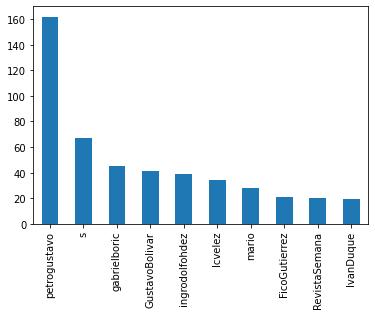

In [ ]:
name_counts[0:10].plot.bar()

In [ ]:
##Esta función recibe un dataframe y una columna

from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  ##SUSTITUIMOS EL PATRÓN DETERMINADO POR UN ESPACIO EN BLANCO. AQUI ELIMINAMOS URL O EMAILS USANDO LA FUNCIÓN SUB
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números O LOS DIGITOS
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation) ##LISTA CON SIGNOS DE PUNTUACIÓN
  non_words.extend(['¿', '¡', '‘', '’']) ##EXTENDEMOS LA LISTA ANTERIOR CON OTROS SIGNOS DE PUNTUACIÓN
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

##Eliminamos las menciones, hashtags y demas

In [ ]:
df_clean = clean_text(df.copy(), 'content')
df_clean.head(6)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,pero si la nueva reforma tributaria es peor q...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[]
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado la reforma tributaria es solo un pr...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[]
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 para aprobar la reforma tributaria es import...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[]
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria es deficiente tasa a pat...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[]
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,la reforma tributaria es para los que tienen ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[]
5,5,https://twitter.com/Marlon11030320/status/1555...,2022-08-06 03:42:46-05:00,la nueva reforma tributaria es para que gente...,1555836768343261184,Marlon11030320,[],NaN,[],NaN,[@lcvelez],[]


## StopWords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[]
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[]
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[]
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[]
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[]


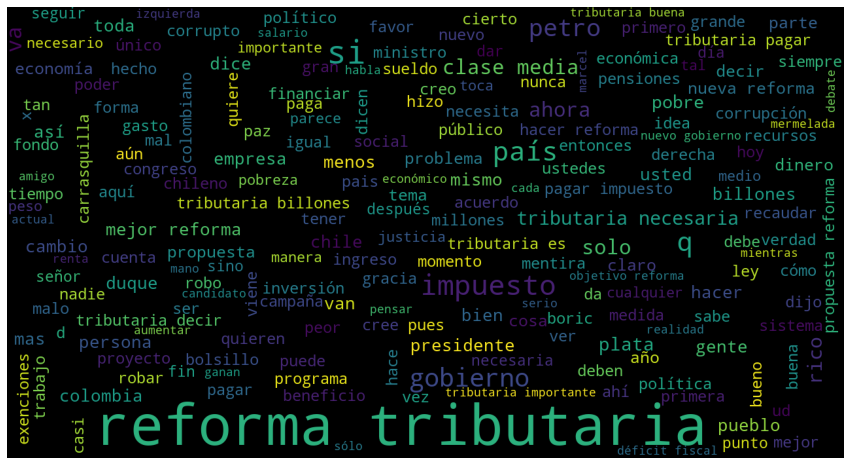

In [ ]:
##NUBE DE PALABRAS DESPUES DE ELIMINAR LAS QUE NO QUEREMOS
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

##Eliminando Emojis

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=9a53968b027b859cf72ca0c185cc54a1c76d5b7c563e8eb8f9ce1050b1ad22aa
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
import emoji

In [ ]:
def remove_emoji(text):
  return emoji.replace_emoji(text,'')

In [ ]:
def replace_emojis(text):
  return emoji.demojize(text,language='es')

In [ ]:
df_clean['tweet']=df_clean['content'].apply(lambda text: remove_emoji(text)) #Columna para análizar sin emojis
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'\s+',' ', elem))
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'^\s+|\s+$','', elem))

##Reemplazando Emojis

In [ ]:
df_clean['tweet_wE']=df_clean['content'].apply(lambda text: replace_emojis(text)) # Columna para análizar como texto de emojis

In [ ]:
df_clean[['content','tweet','tweet_wE']][50:60]

,content,tweet,tweet_wE
50,reforma tributaria mayor señal inestabilidad p...,reforma tributaria mayor señal inestabilidad p...,reforma tributaria mayor señal inestabilidad p...
51,recoger billones pesos reforma tributaria desc...,recoger billones pesos reforma tributaria desc...,recoger billones pesos reforma tributaria desc...
52,dicho reforma tributaria recesivaperseguir riq...,dicho reforma tributaria recesivaperseguir riq...,dicho reforma tributaria recesivaperseguir riq...
53,colombia gobierno entrante alerta déficit fisc...,colombia gobierno entrante alerta déficit fisc...,colombia gobierno entrante alerta déficit fisc...
54,colombia gobierno entrante alerta déficit fisc...,colombia gobierno entrante alerta déficit fisc...,colombia gobierno entrante alerta déficit fisc...
55,📳 “la realidad país gran preocupación nivel fi...,“la realidad país gran preocupación nivel fisc...,:modo_vibración: “la realidad país gran preocu...
56,plata entraría reforma tributaria apenas robar...,plata entraría reforma tributaria apenas robar...,plata entraría reforma tributaria apenas robar...
57,fin paralizar programas próximo gobierno duque...,fin paralizar programas próximo gobierno duque...,fin paralizar programas próximo gobierno duque...
58,fin paralizar programas próximo gobierno duque...,fin paralizar programas próximo gobierno duque...,fin paralizar programas próximo gobierno duque...
59,fin paralizar programas próximo gobierno duque...,fin paralizar programas próximo gobierno duque...,fin paralizar programas próximo gobierno duque...


In [ ]:
df_clean['username'][20:30]

20    Gonzalo17390790
21      billycoin2024
22           eduen025
23           neutruoo
24      patricioarrau
25        guillon2511
26             rndm74
27    charliieventura
28       GladiatorCol
29    EdgardJOrellano
Name: username, dtype: object

## Tokenización

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Creamos una columna en el dataframe con los tokens (Sin emoji): 

In [ ]:
df_clean['tokens'] = df_clean['tweet'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"[si, nueva, reforma, tributaria, peor, carrasq..."
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"[estimado, reforma, tributaria, solo, proyecto..."
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"[aprobar, reforma, tributaria, importante, q, ..."
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"[reforma, tributaria, deficiente, tasa, patrim..."
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"[reforma, tributaria, buen, dinero, preocupa, ..."


Creamos una columna en el dataframe con los tokens (Con texto emoji): 

In [ ]:
df_clean['tokens_wE'] = df_clean['tweet_wE'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq..."
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto..."
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"[aprobar, reforma, tributaria, importante, q, ...","[:, cara_pensativa, :, aprobar, reforma, tribu..."
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim..."
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ..."


In [ ]:
##QUITAMOS PALABRAS CON LETRAS MENORES QUE 1 PALABRA EN TOKENS
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

In [ ]:
df_clean['tokens_clean_wE']=df_clean['tokens_wE']
df_clean['tokens_clean_wE']=df_clean['tokens_clean_wE'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

In [ ]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [ ]:
all_words_wE = list(itertools.chain(*df_clean['tokens_clean_wE']))

In [ ]:
##CONTAMOS LA CANTIDAD EXACTA QUE APARECE CADA PALABRA
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('reforma', 2230),
 ('tributaria', 2138),
 ('si', 330),
 ('impuestos', 279),
 ('gobierno', 237),
 ('país', 211),
 ('petro', 175),
 ('clase', 136),
 ('billones', 127),
 ('hacer', 127),
 ('necesaria', 126),
 ('mejor', 126),
 ('va', 123),
 ('pagar', 120),
 ('media', 116),
 ('solo', 113),
 ('ahora', 113),
 ('ricos', 106),
 ('van', 104),
 ('plata', 98),
 ('decir', 95),
 ('gente', 89),
 ('duque', 88),
 ('menos', 84),
 ('mas', 84),
 ('presidente', 80),
 ('ser', 80),
 ('usted', 78),
 ('nueva', 76),
 ('bien', 76),
 ('chile', 75),
 ('pobres', 74),
 ('colombia', 74),
 ('propuesta', 72),
 ('así', 69)]

In [ ]:
##CONTAMOS LA CANTIDAD EXACTA QUE APARECE CADA PALABRA
counts_words = collections.Counter(all_words_wE)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('reforma', 2231),
 ('tributaria', 2138),
 ('si', 330),
 ('impuestos', 279),
 ('gobierno', 237),
 ('país', 211),
 ('petro', 175),
 ('clase', 136),
 ('billones', 127),
 ('hacer', 127),
 ('necesaria', 126),
 ('mejor', 126),
 ('va', 123),
 ('pagar', 120),
 ('media', 116),
 ('ahora', 114),
 ('solo', 113),
 ('ricos', 106),
 ('van', 104),
 ('plata', 98),
 ('decir', 95),
 ('gente', 89),
 ('duque', 88),
 ('menos', 84),
 ('mas', 84),
 ('presidente', 80),
 ('ser', 80),
 ('usted', 78),
 ('nueva', 76),
 ('bien', 76),
 ('colombia', 75),
 ('chile', 75),
 ('pobres', 74),
 ('propuesta', 72),
 ('así', 69)]

## Frecuencia de bigramas

In [ ]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [ ]:
text = ' '.join(txt for txt in df_clean.tweet)
text

'si nueva reforma tributaria peor carrasquilla necesitan persona valores principios juan sebastian necesitan persona odie mitad colombianos estimado reforma tributaria solo proyecto debe pasar x co grueso todavía prog habitaciónal querrás decir deptos arriendos extranjeros quieren construir ídem aquí aquí recoleta sueldo q x inflación realidad menos sigo aprobar reforma tributaria importante q van gastar si mejorar becas junaeb si financiar cae personas q profesionales ganan mas encima declaran pagar impuestos vale pena reforma tributaria deficiente tasa patrimonio sociedades holding amplia base tributaria sii juez parte calificar elusión recursos administrativos exit tax decir vayase ciertos casos confiscatoria reforma tributaria buen dinero preocupa usted clasifica lukas nueva reforma tributaria gente familia si dinero sabemos dónde ganaron empiecen pagar impuestos manera justa únicos pagamos impuestos actualmente pobres mientras ustedes evanden problema colombia situación tributaria

In [ ]:
text_wE = ' '.join(txt for txt in df_clean.tweet_wE)
text_wE

'si nueva reforma tributaria peor carrasquilla necesitan persona valores principios juan sebastian necesitan persona odie mitad colombianos estimado reforma tributaria solo proyecto debe pasar x co grueso todavía prog habitaciónal querrás decir deptos arriendos extranjeros quieren construir ídem aquí aquí recoleta sueldo q x inflación realidad menos sigo :cara_pensativa: aprobar reforma tributaria importante q van gastar si mejorar becas junaeb si financiar cae personas q profesionales ganan mas encima declaran pagar impuestos vale pena :mono_con_los_ojos_tapados: reforma tributaria deficiente tasa patrimonio sociedades holding amplia base tributaria sii juez parte calificar elusión recursos administrativos exit tax decir vayase ciertos casos confiscatoria reforma tributaria buen dinero preocupa usted clasifica lukas nueva reforma tributaria gente familia si dinero sabemos dónde ganaron empiecen pagar impuestos manera justa únicos pagamos impuestos actualmente pobres mientras ustedes e

In [ ]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean if t!=[]]

In [ ]:
terms_bigram_wE = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean_wE if t!=[]]

In [ ]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('reforma', 'tributaria'), 2046),
 (('clase', 'media'), 115),
 (('tributaria', 'necesaria'), 100),
 (('mejor', 'reforma'), 82),
 (('nueva', 'reforma'), 53),
 (('tributaria', 'es'), 41),
 (('propuesta', 'reforma'), 40),
 (('si', 'reforma'), 37),
 (('tributaria', 'decir'), 35),
 (('hacer', 'reforma'), 34),
 (('tributaria', 'billones'), 32),
 (('tributaria', 'pagar'), 27),
 (('pagar', 'impuestos'), 24),
 (('tributaria', 'solo'), 22),
 (('tributaria', 'importante'), 22)]

In [ ]:
bigramsList_wE = list(itertools.chain(*terms_bigram_wE))
bigram_counts_wE = collections.Counter(bigramsList_wE)
bigram_counts_wE.most_common(15)

[(('reforma', 'tributaria'), 2047),
 (('clase', 'media'), 115),
 (('tributaria', 'necesaria'), 100),
 (('mejor', 'reforma'), 82),
 (('nueva', 'reforma'), 53),
 (('tributaria', 'es'), 41),
 (('propuesta', 'reforma'), 40),
 (('si', 'reforma'), 37),
 (('tributaria', 'decir'), 35),
 (('hacer', 'reforma'), 34),
 (('tributaria', 'billones'), 32),
 (('tributaria', 'pagar'), 27),
 (('pagar', 'impuestos'), 24),
 (('tributaria', 'solo'), 22),
 (('tributaria', 'importante'), 22)]

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(reforma, tributaria)",2046
1,"(clase, media)",115
2,"(tributaria, necesaria)",100
3,"(mejor, reforma)",82
4,"(nueva, reforma)",53
5,"(tributaria, es)",41
6,"(propuesta, reforma)",40
7,"(si, reforma)",37
8,"(tributaria, decir)",35
9,"(hacer, reforma)",34


In [ ]:
bigram_df_wE = pd.DataFrame(bigram_counts_wE.most_common(50),columns=['bigram', 'count'])
bigram_df_wE

,bigram,count
0,"(reforma, tributaria)",2047
1,"(clase, media)",115
2,"(tributaria, necesaria)",100
3,"(mejor, reforma)",82
4,"(nueva, reforma)",53
5,"(tributaria, es)",41
6,"(propuesta, reforma)",40
7,"(si, reforma)",37
8,"(tributaria, decir)",35
9,"(hacer, reforma)",34


In [ ]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [ ]:
d_wE = bigram_df_wE.set_index('bigram').T.to_dict('records')

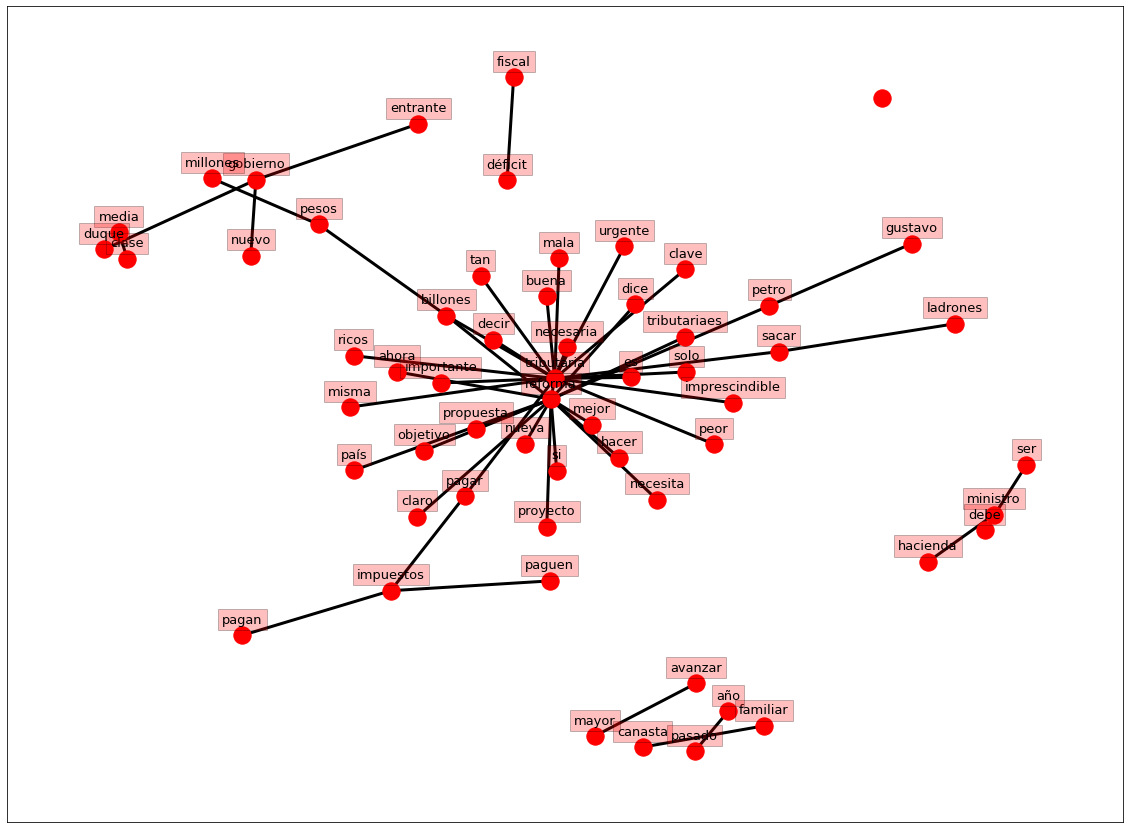

In [ ]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

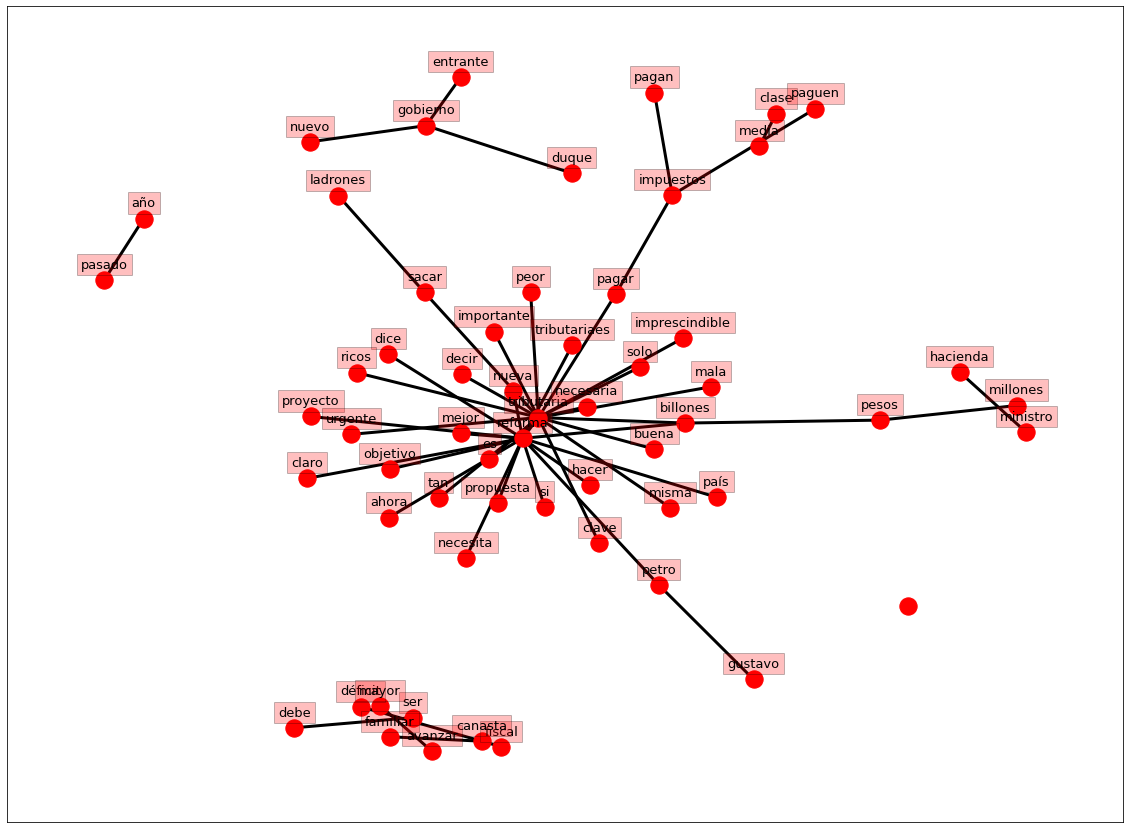

In [ ]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d_wE[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

##Lematización (Lemmatization)

In [ ]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

2022-08-07 23:27:19.736966: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 13.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import es_core_news_sm
nlp = es_core_news_sm.load()

In [ ]:
print(df_clean.tweet[0])
d=nlp(df_clean.tweet[0])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

si nueva reforma tributaria peor carrasquilla necesitan persona valores principios juan sebastian necesitan persona odie mitad colombianos


[['si', 'si', 'SCONJ', ''],
 ['nueva', 'nuevo', 'ADJ', ''],
 ['reforma', 'reforma', 'NOUN', ''],
 ['tributaria', 'tributario', 'ADJ', ''],
 ['peor', 'peor', 'ADV', ''],
 ['carrasquilla', 'carrasquilla', 'NOUN', ''],
 ['necesitan', 'necesitar', 'VERB', ''],
 ['persona', 'persona', 'NOUN', ''],
 ['valores', 'valor', 'NOUN', ''],
 ['principios', 'principio', 'ADJ', ''],
 ['juan', 'juan', 'PROPN', 'PER'],
 ['sebastian', 'sebastiar', 'VERB', ''],
 ['necesitan', 'necesitar', 'VERB', ''],
 ['persona', 'persona', 'NOUN', ''],
 ['odie', 'odie', 'ADJ', ''],
 ['mitad', 'mitad', 'VERB', ''],
 ['colombianos', 'colombiano', 'ADJ', '']]

In [ ]:
print(df_clean.tweet_wE[0])
d_wE=nlp(df_clean.tweet_wE[0])
t_wE=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t_wE

si nueva reforma tributaria peor carrasquilla necesitan persona valores principios juan sebastian necesitan persona odie mitad colombianos


[['si', 'si', 'SCONJ', ''],
 ['nueva', 'nuevo', 'ADJ', ''],
 ['reforma', 'reforma', 'NOUN', ''],
 ['tributaria', 'tributario', 'ADJ', ''],
 ['peor', 'peor', 'ADV', ''],
 ['carrasquilla', 'carrasquilla', 'NOUN', ''],
 ['necesitan', 'necesitar', 'VERB', ''],
 ['persona', 'persona', 'NOUN', ''],
 ['valores', 'valor', 'NOUN', ''],
 ['principios', 'principio', 'ADJ', ''],
 ['juan', 'juan', 'PROPN', 'PER'],
 ['sebastian', 'sebastiar', 'VERB', ''],
 ['necesitan', 'necesitar', 'VERB', ''],
 ['persona', 'persona', 'NOUN', ''],
 ['odie', 'odie', 'ADJ', ''],
 ['mitad', 'mitad', 'VERB', ''],
 ['colombianos', 'colombiano', 'ADJ', '']]

In [ ]:
##Creamos otra columna y llevamos cada palabra original a su lema, o palabra base. Por ejemplo: Hizo --> Hacer
df_clean['lemmas'] = df_clean.tweet.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [ ]:
df_clean[['tweet','lemmas']].head(20)

,tweet,lemmas
0,si nueva reforma tributaria peor carrasquilla ...,"[si, nuevo, reforma, tributario, peor, carrasq..."
1,estimado reforma tributaria solo proyecto debe...,"[estimado, reforma, tributario, solo, proyecto..."
2,aprobar reforma tributaria importante q van ga...,"[aprobar, reforma, tributario, importante, q, ..."
3,reforma tributaria deficiente tasa patrimonio ...,"[reforma, tributario, deficiente, tasa, patrim..."
4,reforma tributaria buen dinero preocupa usted ...,"[reforma, tributario, buen, dinero, preocupo, ..."
5,nueva reforma tributaria gente familia si dine...,"[nuevo, reforma, tributario, gente, familio, s..."
6,problema colombia situación tributaria genera ...,"[problema, colombia, situación, tributario, ge..."
7,olla raspada billones presupuesto bill reforma...,"[ollo, raspado, billón, presupuesto, bill, ref..."
8,reforma tributaria estupidez tal afirmación ab...,"[reforma, tributario, estupidez, tal, afirmaci..."
9,buena propuesta reforma tributaria aquella rec...,"[buen, propuesta, reforma, tributario, aquel, ..."


In [ ]:
##Creamos otra columna y llevamos cada palabra original a su lema, o palabra base. Por ejemplo: Hizo --> Hacer
df_clean['lemmas_wE'] = df_clean.tweet_wE.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [ ]:
df_clean[['tweet_wE','lemmas_wE']].head(20)

,tweet_wE,lemmas_wE
0,si nueva reforma tributaria peor carrasquilla ...,"[si, nuevo, reforma, tributario, peor, carrasq..."
1,estimado reforma tributaria solo proyecto debe...,"[estimado, reforma, tributario, solo, proyecto..."
2,:cara_pensativa: aprobar reforma tributaria im...,"[:, cara_pensativa, :, aprobar, reforma, tribu..."
3,reforma tributaria deficiente tasa patrimonio ...,"[reforma, tributario, deficiente, tasa, patrim..."
4,reforma tributaria buen dinero preocupa usted ...,"[reforma, tributario, buen, dinero, preocupo, ..."
5,nueva reforma tributaria gente familia si dine...,"[nuevo, reforma, tributario, gente, familio, s..."
6,problema colombia situación tributaria genera ...,"[problema, colombia, situación, tributario, ge..."
7,olla raspada billones presupuesto bill reforma...,"[ollo, raspado, billón, presupuesto, bill, ref..."
8,reforma tributaria estupidez tal afirmación ab...,"[reforma, tributario, estupidez, tal, afirmaci..."
9,buena propuesta reforma tributaria aquella rec...,"[buen, propuesta, reforma, tributario, aquel, ..."


In [ ]:
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE
0,0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq...","[si, nuevo, reforma, tributario, peor, carrasq...","[si, nuevo, reforma, tributario, peor, carrasq..."
1,1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributario, solo, proyecto...","[estimado, reforma, tributario, solo, proyecto..."
2,2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"[aprobar, reforma, tributaria, importante, q, ...","[:, cara_pensativa, :, aprobar, reforma, tribu...","[aprobar, reforma, tributaria, importante, van...","[aprobar, reforma, tributaria, importante, van...","[aprobar, reforma, tributario, importante, q, ...","[:, cara_pensativa, :, aprobar, reforma, tribu..."
3,3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributario, deficiente, tasa, patrim...","[reforma, tributario, deficiente, tasa, patrim..."
4,4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributario, buen, dinero, preocupo, ...","[reforma, tributario, buen, dinero, preocupo, ..."


In [ ]:
df_clean.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'id', 'username', 'outlinks',
       'outlinksss', 'tcooutlinks', 'tcooutlinksss', 'mentions', 'hashtag',
       'tweet', 'tweet_wE', 'tokens', 'tokens_wE', 'tokens_clean',
       'tokens_clean_wE', 'lemmas', 'lemmas_wE'],
      dtype='object')

In [ ]:
df_clean = df_clean.drop(labels='Unnamed: 0', axis=1)

In [ ]:
df_clean.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,[@wilsonariasc],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq...","[si, nueva, reforma, tributaria, peor, carrasq...","[si, nuevo, reforma, tributario, peor, carrasq...","[si, nuevo, reforma, tributario, peor, carrasq..."
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"[@futbolsur11, @Canilemo, @_alvaromunoz]",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributaria, solo, proyecto...","[estimado, reforma, tributario, solo, proyecto...","[estimado, reforma, tributario, solo, proyecto..."
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"[aprobar, reforma, tributaria, importante, q, ...","[:, cara_pensativa, :, aprobar, reforma, tribu...","[aprobar, reforma, tributaria, importante, van...","[aprobar, reforma, tributaria, importante, van...","[aprobar, reforma, tributario, importante, q, ...","[:, cara_pensativa, :, aprobar, reforma, tribu..."
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,[@juanfcosanchezs],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributaria, deficiente, tasa, patrim...","[reforma, tributario, deficiente, tasa, patrim...","[reforma, tributario, deficiente, tasa, patrim..."
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,[@lcvelez],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributaria, buen, dinero, preocupa, ...","[reforma, tributario, buen, dinero, preocupo, ...","[reforma, tributario, buen, dinero, preocupo, ..."


In [ ]:
df_clean.to_csv(path+'Reforma_Tributaria_2022_clean.csv')

In [ ]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('reforma', 2247),
 ('tributario', 2125),
 ('impuesto', 341),
 ('si', 330),
 ('ir', 311),
 ('hacer', 303),
 ('decir', 299),
 ('pagar', 264),
 ('gobierno', 255),
 ('país', 225),
 ('q', 202),
 ('petro', 165),
 ('poder', 163),
 ('necesario', 152),
 ('nuevo', 144)]

##Bag of Words

In [ ]:
import gensim
from gensim import corpora
import numpy as np

In [ ]:
words=[]
for w in df_clean.lemmas:
  words.append(w)

In [ ]:
words_wE=[]
for w in df_clean.lemmas_wE:
  words_wE.append(w)

In [ ]:
words_wE

[['si',
  'nuevo',
  'reforma',
  'tributario',
  'peor',
  'carrasquilla',
  'necesitar',
  'persona',
  'valor',
  'principio',
  'juan',
  'sebastiar',
  'necesitar',
  'persona',
  'odie',
  'mitad',
  'colombiano'],
 ['estimado',
  'reforma',
  'tributario',
  'solo',
  'proyecto',
  'deber',
  'pasar',
  'x',
  'co',
  'grueso',
  'todavía',
  'prog',
  'habitaciónal',
  'querrás',
  'decir',
  'depto',
  'arriendo',
  'extranjero',
  'querer',
  'construir',
  'ídem',
  'aquí',
  'aquí',
  'recoletar',
  'sueldo',
  'q',
  'x',
  'inflación',
  'realidad',
  'menos',
  'sigo'],
 [':',
  'cara_pensativa',
  ':',
  'aprobar',
  'reforma',
  'tributario',
  'importante',
  'q',
  'ir',
  'gastar',
  'si',
  'mejorar',
  'beca',
  'junaeb',
  'si',
  'financiar',
  'caer',
  'persona',
  'q',
  'profesional',
  'ganar',
  'mas',
  'encima',
  'declarar',
  'pagar',
  'impuesto',
  'valer',
  'pena',
  ':',
  'mono_con_los_ojos_tapado',
  ':'],
 ['reforma',
  'tributario',
  'deficie

In [ ]:
words

[['medio',
  'derecho',
  'fin',
  'cabo',
  'supuesto',
  'amenaza',
  'asesinato',
  'colectivo',
  'insumo',
  'ilícito',
  'ley',
  'solidaridad',
  'sostenible',
  'simple',
  'pasquín',
  'valer',
  'ph'],
 ['papito',
  'alístese',
  'salir',
  'reforma',
  'tributario',
  'llamar',
  'pequeño',
  'cretino',
  'ley',
  'solidaridad',
  'sostenible'],
 ['ley', 'financiamiento', 'ley', 'solidaridad', 'sostenible'],
 ['miércoles',
  'agosto',
  'partir',
  'am',
  'conéctate',
  'diálogo',
  'académico',
  'propositivo',
  'encaminado',
  'análisis',
  'proyecto',
  'ley',
  'solidaridad',
  'sostenible',
  'construcción',
  'político',
  'fiscal',
  'transmisión',
  'través',
  'fblive'],
 ['ley',
  'solidaridad',
  'sostenible',
  'ley',
  'inversión',
  'social',
  'siempre',
  'reforma',
  'tributario',
  'camuflado'],
 ['negar',
  'reconocer él',
  'parecer',
  'eufemismos',
  'pasar',
  'cuento',
  'ley',
  'solidaridad',
  'sostenible',
  'farso',
  'rescate',
  'social',
  '

In [ ]:
dic=corpora.Dictionary(words)

In [ ]:
dic_wE=corpora.Dictionary(words_wE)

In [ ]:
bow_corpus = [dic.doc2bow(w) for w in words]

In [ ]:
bow_corpus_wE = [dic.doc2bow(w) for w in words_wE]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.068*"reforma" + 0.061*"tributario" + 0.017*"mejor" + 0.016*"gobierno" + 0.011*"sacar" + 0.011*"ladrón" + 0.010*"hacer" + 0.008*"impuesto" + 0.008*"buen" + 0.007*"necesario"'),
 (1,
  '0.049*"reforma" + 0.049*"tributario" + 0.018*"hacer" + 0.014*"persona" + 0.013*"ahí" + 0.011*"primero" + 0.011*"gobierno" + 0.008*"decir" + 0.008*"boric" + 0.008*"esperar"'),
 (2,
  '0.028*"reforma" + 0.022*"tributario" + 0.021*"q" + 0.017*"…" + 0.016*"pobre" + 0.015*"si" + 0.014*"inversión" + 0.009*"colombia" + 0.009*"acaso" + 0.008*"extranjero"'),
 (3,
  '0.065*"reforma" + 0.065*"tributario" + 0.015*"decir" + 0.014*"ir" + 0.011*"pagar" + 0.010*"“" + 0.010*"”" + 0.010*"impuesto" + 0.010*"poder" + 0.009*"si"')]

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b0f5f77ceff18c011bc41ae07b7b765acfa7d81850460e0fdb1426e0a932b298
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.076674  0.047006       1        1  56.152409
0     -0.167183  0.027618       2        1  20.029770
1      0.070044 -0.204225       3        1  14.895706
2      0.173813  0.129601       4        1   8.922115, topic_info=           Term         Freq        Total Category  logprob  loglift
10      reforma  1982.000000  1982.000000  Default  30.0000  30.0000
13   tributario  1916.000000  1916.000000  Default  29.0000  29.0000
31            q   114.000000   114.000000  Default  28.0000  28.0000
95        pobre    96.000000    96.000000  Default  27.0000  27.0000
270       mejor   217.000000   217.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
674    congreso    15.892151    38.353041   Topic4  -5.2238   1.5356
51     impuesto    17.575588   249.263587   Topic4  -5.1231  -0.2354
150       hacer    17.560693   264.258929   Topic4  -5.1240  -0.2946
134     empresa    15.884690    52.235420   Topic4  -5.2243   1.2262
52           ir    15.749162   298.163315   Topic4  -5.2329  -0.5242

[239 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
552       2  0.968415  acabar
2440      4  0.962923   acaso
176       1  0.810355   ahora
176       2  0.100457   ahora
176       4  0.087063   ahora
...     ...       ...     ...
551       4  0.836096  último
536       1  0.995157       “
537       1  0.998790       ”
612       4  0.982959       …
6239      3  0.968265       ➟

[273 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [ ]:
lda_model_wE = gensim.models.LdaMulticore(bow_corpus_wE,num_topics = 4, id2word = dic, passes = 20)
lda_model_wE.show_topics()

[(0,
  '0.054*"reforma" + 0.047*"tributario" + 0.014*"si" + 0.013*"pagar" + 0.011*"…" + 0.009*"hacer" + 0.009*"robar" + 0.009*"mejor" + 0.009*"inversión" + 0.008*"impuesto"'),
 (1,
  '0.062*"reforma" + 0.054*"tributario" + 0.018*"gobierno" + 0.016*"impuesto" + 0.012*"solo" + 0.011*"pagar" + 0.010*"necesario" + 0.010*"mejor" + 0.008*"“" + 0.008*"deber"'),
 (2,
  '0.070*"tributario" + 0.063*"reforma" + 0.012*"hacer" + 0.012*"gobierno" + 0.011*"decir" + 0.010*"persona" + 0.009*"q" + 0.009*"sacar" + 0.008*"propuesta" + 0.008*"si"'),
 (3,
  '0.054*"reforma" + 0.049*"tributario" + 0.021*"ir" + 0.013*"decir" + 0.012*"hacer" + 0.008*"mejor" + 0.007*"si" + 0.007*"ahora" + 0.007*"así" + 0.007*"amigo"')]

In [ ]:
pyLDAvis.enable_notebook()
vis_wE = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus_wE, dic)
vis_wE

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.076674  0.047006       1        1  56.192131
0     -0.167183  0.027618       2        1  20.015047
1      0.070044 -0.204225       3        1  14.880295
2      0.173813  0.129601       4        1   8.912528, topic_info=           Term         Freq        Total Category  logprob  loglift
10      reforma  1982.000000  1982.000000  Default  30.0000  30.0000
13   tributario  1917.000000  1917.000000  Default  29.0000  29.0000
31            q   114.000000   114.000000  Default  28.0000  28.0000
95        pobre    96.000000    96.000000  Default  27.0000  27.0000
270       mejor   217.000000   217.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
674    congreso    15.876515    38.316781   Topic4  -5.2238   1.5367
51     impuesto    17.558295   249.356600   Topic4  -5.1231  -0.2356
150       hacer    17.543414   264.184021   Topic4  -5.1240  -0.2943
134     empresa    15.869061    52.224255   Topic4  -5.2243   1.2265
52           ir    15.733666   298.349211   Topic4  -5.2329  -0.5247

[239 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
552       2  0.969029  acabar
2440      4  0.963849   acaso
176       1  0.809957   ahora
176       2  0.100408   ahora
176       4  0.087020   ahora
...     ...       ...     ...
551       4  0.836723  último
536       1  0.999493       “
537       1  0.997997       ”
612       4  0.983916       …
6239      3  0.969162       ➟

[273 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

##ANÁLISIS DE SENTIMIENTOS

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from textblob import TextBlob
import re

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/EIA/Analítica de Datos para BD-BI/Reforma_Tributaria_2022_clean.csv', encoding='utf-8-sig')

In [ ]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [ ]:
df.head(5)

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor..."
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ..."
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"['aprobar', 'reforma', 'tributaria', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor..."
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'..."
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p..."


In [ ]:
!mkdir -p ~/.aws &&\
  cp /content/drive/MyDrive/EIA/Analítica\ de\ Datos\ para\ BD-BI/credencials.txt ~/.aws/credentials

In [ ]:
pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
text = "Este curso es una maravilla. Las clases virtuales también son buenas"
sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
sentiment

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '165',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sun, 07 Aug 2022 23:55:46 GMT',
   'x-amzn-requestid': '863675e0-eccd-42ea-942a-19059a81a3c3'},
  'HTTPStatusCode': 200,
  'RequestId': '863675e0-eccd-42ea-942a-19059a81a3c3',
  'RetryAttempts': 0},
 'Sentiment': 'POSITIVE',
 'SentimentScore': {'Mixed': 7.289922359632328e-05,
  'Negative': 7.47397934901528e-05,
  'Neutral': 0.0025757814291864634,
  'Positive': 0.9972766041755676}}

##FUNCIÓN PARA PREDECIR SENTIMIENTO USANDO AWS

In [ ]:
def detect_Sentiment_AWS(comprehend,text):
  try:
    sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
    s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
    return [sentiment['Sentiment'], sentiment['SentimentScore'][s]]
  except:
    print('error teewt: '+text)
    return ['NEUTRAL',1]

In [ ]:
#Aplicamos la función a todos los Twits (sin Emoji)
df['Sent_AWS']=df['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

In [ ]:
df[10:30]

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Sent_AWS
10,https://twitter.com/zullyfajardo1/status/15556...,2022-08-05 18:22:28-05:00,reforma tributaria peor siquiera tocaría heren...,1555695764990562305,zullyfajardo1,[],NaN,[],NaN,"['@suarezvacca', '@IvanDuque', '@petrogustavo']",[],reforma tributaria peor siquiera tocaría heren...,reforma tributaria peor siquiera tocaría heren...,"['reforma', 'tributaria', 'peor', 'siquiera', ...","['reforma', 'tributaria', 'peor', 'siquiera', ...","['reforma', 'tributaria', 'peor', 'siquiera', ...","['reforma', 'tributaria', 'peor', 'siquiera', ...","['reforma', 'tributario', 'peor', 'siquiera', ...","['reforma', 'tributario', 'peor', 'siquiera', ...","[MIXED, 0.7098107933998108]"
11,https://twitter.com/Carloszambran05/status/155...,2022-08-05 17:32:17-05:00,jajajajajajjajajajajajajjaa verdad reforma tri...,1555683134456438784,Carloszambran05,[],NaN,[],NaN,"['@suarezvacca', '@IvanDuque', '@petrogustavo']",[],jajajajajajjajajajajajajjaa verdad reforma tri...,jajajajajajjajajajajajajjaa verdad reforma tri...,"['jajajajajajjajajajajajajjaa', 'verdad', 'ref...","['jajajajajajjajajajajajajjaa', 'verdad', 'ref...","['jajajajajajjajajajajajajjaa', 'verdad', 'ref...","['jajajajajajjajajajajajajjaa', 'verdad', 'ref...","['jajajajajajjajajajajajajjaa', 'verdad', 'ref...","['jajajajajajjajajajajajajjaa', 'verdad', 'ref...","[NEUTRAL, 0.9135055541992188]"
12,https://twitter.com/lkdalatierrita/status/1555...,2022-08-05 16:24:52-05:00,ahora multiplique x da platal cuántos colombia...,1555666169650184193,lkdalatierrita,[],NaN,[],NaN,"['@bluchob', '@Danielbricen']",[],ahora multiplique x da platal cuántos colombia...,ahora multiplique x da platal cuántos colombia...,"['ahora', 'multiplique', 'x', 'da', 'platal', ...","['ahora', 'multiplique', 'x', 'da', 'platal', ...","['ahora', 'multiplique', 'da', 'platal', 'cuán...","['ahora', 'multiplique', 'da', 'platal', 'cuán...","['ahora', 'multiplique', 'x', 'dar', 'platal',...","['ahora', 'multiplique', 'x', 'dar', 'platal',...","[MIXED, 0.7951380610466003]"
13,https://twitter.com/alonsound/status/155562839...,2022-08-05 13:54:45-05:00,diciendo presupuesto reforma tributaria mismo ...,1555628393986723841,alonsound,[],NaN,[],NaN,['@VargasvilCol'],[],diciendo presupuesto reforma tributaria mismo ...,diciendo presupuesto reforma tributaria mismo ...,"['diciendo', 'presupuesto', 'reforma', 'tribut...","['diciendo', 'presupuesto', 'reforma', 'tribut...","['diciendo', 'presupuesto', 'reforma', 'tribut...","['diciendo', 'presupuesto', 'reforma', 'tribut...","['decir', 'presupuesto', 'reforma', 'tributari...","['decir', 'presupuesto', 'reforma', 'tributari...","[NEGATIVE, 0.7724533081054688]"
14,https://twitter.com/Lfsalinas2022/status/15556...,2022-08-05 12:36:17-05:00,ninguna asfixia reforma tributaria mas ricos p...,1555608646897246211,Lfsalinas2022,[],NaN,[],NaN,['@lcvelez'],[],ninguna asfixia reforma tributaria mas ricos p...,ninguna asfixia reforma tributaria mas ricos p...,"['ninguna', 'asfixia', 'reforma', 'tributaria'...","['ninguna', 'asfixia', 'reforma', 'tributaria'...","['ninguna', 'asfixia', 'reforma', 'tributaria'...","['ninguna', 'asfixia', 'reforma', 'tributaria'...","['ninguno', 'asfixio', 'reforma', 'tributario'...","['ninguno', 'asfixio', 'reforma', 'tributario'...","[MIXED, 0.613984227180481]"
15,https://twitter.com/gallitopolis/status/155559...,2022-08-05 11:27:05-05:00,serio reforma tributaria hizo q jóvenes salier...,1555591229387247617,gallitopolis,[],NaN,[],NaN,['@GustavoBolivar'],[],serio reforma tributaria hizo q jóvenes salier...,serio reforma tributaria hizo q jóvenes salier...,"['serio', 'reforma', 'tributaria', 'hizo', 'q'...","['serio', 'reforma', 'tributaria', 'hizo', 'q'...","['serio', 'reforma', 'tributaria', 'hizo', 'jó...","['serio', 'reforma', 'tributaria', 'hizo', 'jó...","['serio', 'reforma', 'tributario', '

In [ ]:
#Aplicamos la función a todos los Twits (Con Texto Emoji)
df['Sent_AWS_wE']=df['tweet_wE'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

In [ ]:
# Dividir la columna Sent_AWS. Sentimiento y el score
df[['sentimentAWS','polarityAWS']] = pd.DataFrame(df.Sent_AWS.tolist(), index= df.index)

In [ ]:
# Dividir la columna Sent_AWS. Sentimiento y el score (Con texto Emoji)
df[['sentimentAWS_wE','polarityAWS_wE']] = pd.DataFrame(df.Sent_AWS_wE.tolist(), index= df.index)

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Sent_AWS,Sent_AWS_wE,sentimentAWS,polarityAWS,sentimentAWS_wE,polarityAWS_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","[MIXED, 0.6561458110809326]","[MIXED, 0.6561458110809326]",MIXED,0.656146,MIXED,0.656146
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","[MIXED, 0.9282881617546082]","[MIXED, 0.9282881617546082]",MIXED,0.928288,MIXED,0.928288
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,"['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","[MIXED, 0.4811437726020813]","[NEGATIVE, 0.3531249165534973]",MIXED,0.481144,NEGATIVE,0.353125
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","[NEGATIVE, 0.6520265936851501]","[NEGATIVE, 0.6520265936851501]",NEGATIVE,0.652027,NEGATIVE,0.652027
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","[NEUTRAL, 0.5090020298957825]","[NEUTRAL, 0.5090020298957825]",NEUTRAL,0.509002,NEUTRAL,0.509002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 15:21:21-05:00,estupidez gracias protestas reforma tributaria...,1478099180816109573,edrova25,[],NaN,[],NaN,"['@Francis60220940', '@Mafalda_2020_']",...,"['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protesta', 'reforma'...","['estupidez', 'gracias', 'protesta', 'reforma'...","[NEGATIVE, 0.6506118774414062]","[NEGATIVE, 0.6506118774414062]",NEGATIVE,0.650612,NEGATIVE,0.650612
2052,https://twitter.com/PequeFran/status/147804187...,2022-01-03 11:33:38-05:00,parece insólito q existan voces encuentren rie...,1478041875047137287,PequeFran,[],NaN,[],NaN,"['@r_echecopar', '@cristobalotero']",...,"['parece', 'insólito', 'existan', 'voces', 'en...","['parece', 'insólito', 'existan', 'voces', 'en...","['parecer', 'insólito', 'q', 'existir', 'voz',...","['parecer', 'insólito', 'q', 'existir', 'voz',...","[NEGATIVE, 0.8385838270187378]","[NEGATIVE, 0.8385838270187378]",NEGATIVE,0.838584,NEGATIVE,0.838584


In [ ]:
df.sentimentAWS.value_counts() #Sin Emoji

NEUTRAL     931
NEGATIVE    576
MIXED       536
POSITIVE     13
Name: sentimentAWS, dtype: int64

In [ ]:
df.sentimentAWS_wE.value_counts() # con Emoji

NEUTRAL     943
NEGATIVE    577
MIXED       524
POSITIVE     12
Name: sentimentAWS_wE, dtype: int64

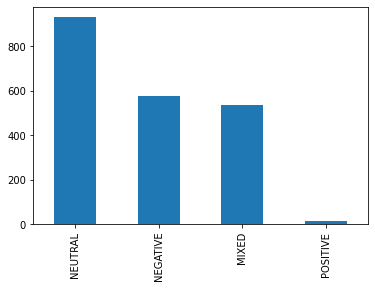

In [ ]:
df.sentimentAWS.value_counts().plot(kind='bar')

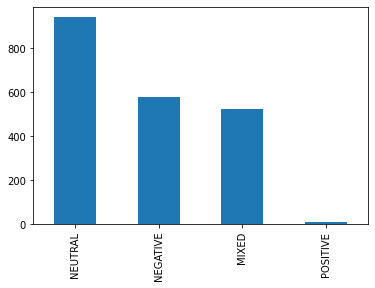

In [ ]:
df.sentimentAWS_wE.value_counts().plot(kind='bar')

In [ ]:
positives = df[df['sentimentAWS']=='POSITIVE']['tweet']
positives

238        buena reforma tributaria quita impuestos gente
722     privilegio si sacartr chucha trabajando tr va ...
797     broma salto desarrollo reforma tributaria buen...
897     muchas gracias explicación ser sensatos llegue...
1054    q contento reforma tributaria roy barreras q v...
1102    buenísimo saber ocampo elegido ministro hacien...
1312    mejor reforma tributaria disminución tamaño va...
1397    excelente enfoque gobierno medida prioritaria ...
1398    excelente enfoque gobierno medida prioritaria ...
1417    corrección reforma tributaria clavarnos billon...
1683    excelente intervención estimando gonzalo… idea...
1705    forma correcta así nueva constitución actual a...
1949    gracias bonito suerte poder elegir vivir traba...
Name: tweet, dtype: object

In [ ]:
neutrales = df[df['sentimentAWS']=='NEUTRAL']['tweet']
neutrales

4       reforma tributaria buen dinero preocupa usted ...
11      jajajajajajjajajajajajajjaa verdad reforma tri...
17      animalito monte reforma tributaria nunca pagad...
24      reforma tributaria retroceso objetivos simplic...
25      mejor reforma tributaria reducir fuertemente b...
                              ...                        
2043    reforma tributaria venganza narcoparamilitar m...
2044    trabajar reforma tributaria buena causa justic...
2046             reforma tributaria buen ejemplo dicho bj
2047    plantea analiza buen punto referencia borde qu...
2049    dar explicaciones embargo creo reforma tributa...
Name: tweet, Length: 931, dtype: object

In [ ]:
mixed = df[df['sentimentAWS']=='MIXED']['tweet']
mixed

0       si nueva reforma tributaria peor carrasquilla ...
1       estimado reforma tributaria solo proyecto debe...
2       aprobar reforma tributaria importante q van ga...
5       nueva reforma tributaria gente familia si dine...
9       buena propuesta reforma tributaria aquella rec...
                              ...                        
2026    prensa tradicional actitud total apoyo gobiern...
2027    esperar primer gabinete boric mario marcel ahí...
2028    esperar primer gabinete boric mario marcel ahí...
2030    reforma tributaria gracias propuesta gobierno ...
2038    evópoli definió oposición colaborativa futuro ...
Name: tweet, Length: 536, dtype: object

In [ ]:
negatives = df[df['sentimentAWS']=='NEGATIVE']['tweet']
negatives

3       reforma tributaria deficiente tasa patrimonio ...
6       problema colombia situación tributaria genera ...
7       olla raspada billones presupuesto bill reforma...
8       reforma tributaria estupidez tal afirmación ab...
13      diciendo presupuesto reforma tributaria mismo ...
                              ...                        
2051    estupidez gracias protestas reforma tributaria...
2052    parece insólito q existan voces encuentren rie...
2053    solo principio pgu siendo presentado gasto per...
2054    si bloqueos huevos unidad pagando impuestos re...
2055    mentirosa mierda corrupta siempre comunista mi...
Name: tweet, Length: 576, dtype: object

##OTRAS BIBLIOTECAS

### Vader

In [ ]:
pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [ ]:
df['tweet'][13]

'diciendo presupuesto reforma tributaria mismo tratando engañar gente doy números significado'

In [ ]:
lines_list = tokenize.sent_tokenize(df['tweet'][14])
lines_list

['ninguna asfixia reforma tributaria mas ricos pobres declarar']

In [ ]:
##Con esta biblioteca estamos intentando determinar el sentimiento del tuit anterior
for sentence in lines_list:
  sid = SentimentIntensityAnalyzer()
  print(f'{sentence} \nhere we are')
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print(k, ss[k])
  print()

ninguna asfixia reforma tributaria mas ricos pobres declarar 
here we are
compound 0.0
neg 0.0
neu 1.0
pos 0.0



In [ ]:
def detectWithVader(text):
  lines_list = tokenize.sent_tokenize(text)
  sid = SentimentIntensityAnalyzer()
  for sentence in lines_list:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentence)
    return ss

In [ ]:
detectWithVader(df['tweet'][14])

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor..."
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ..."
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"['aprobar', 'reforma', 'tributaria', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor..."
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'..."
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 15:21:21-05:00,estupidez gracias protestas reforma tributaria...,1478099180816109573,edrova25,[],NaN,[],NaN,"['@Francis60220940', '@Mafalda_2020_']",[],estupidez gracias protestas reforma tributaria...,estupidez gracias protestas reforma tributaria...,"['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protesta', 'r

In [ ]:
#Aplicamos la función a todos los tuits Sin Emoji
df['Vader']=df['tweet'].apply(lambda text: detectWithVader(text))

In [ ]:
#Aplicamos la función a todos los twits Con Emoji
df['Vader_wE']=df['tweet_wE'].apply(lambda text: detectWithVader(text))

In [ ]:
df['Vader_wE'[0]]

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Vader,Vader_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"['aprobar', 'reforma', 'tributaria', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.c

In [ ]:
# Se crea función para acceder al diccionario
def sentimentWithVader(a):

  return max(a, key=a.get)

In [ ]:
#Aplicamos la función a todos los tuits

df['Vader_1']=df['Vader'].apply(lambda text: sentimentWithVader(text))

In [ ]:
df['Vader_wE_1']=df['Vader_wE'].apply(lambda text: sentimentWithVader(text))

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Vader,Vader_wE,Vader_1,Vader_wE_1
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,"['aprobar', 'reforma', 'tributaria', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 15:21:21-05:00,estupidez gracias protestas reforma tributaria...,1478099180816109573,edrova25,[],NaN,[],NaN,"['@Francis60220940', '@Mafalda_2020_']",...,"['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protesta', 'reforma'..."

In [ ]:
df.Vader_1.value_counts()

neu         2053
compound       3
Name: Vader_1, dtype: int64

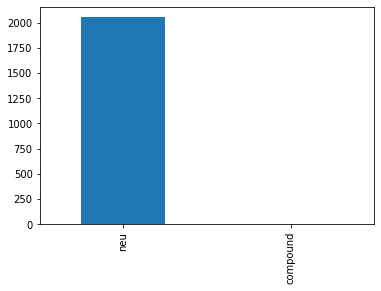

In [ ]:
df.Vader_1.value_counts().plot(kind='bar')

In [ ]:
df.Vader_wE_1.value_counts()

neu         2053
compound       3
Name: Vader_wE_1, dtype: int64

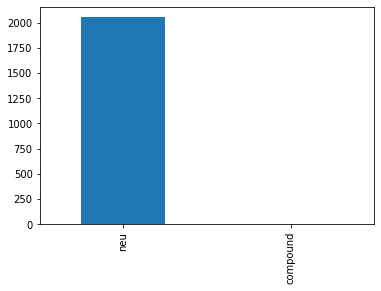

In [ ]:
df.Vader_wE_1.value_counts().plot(kind='bar')

### Pipeline

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.7 MB 15.5 MB/s 
     |████████████████████████████████| 6.6 MB 41.2 MB/s 
     |████████████████████████████████| 596 kB 48.8 MB/s 
     |████████████████████████████████| 101 kB 9.7 MB/s 


In [ ]:
from transformers import pipeline

In [ ]:
sentiment = pipeline(task = 'sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
results = sentiment('i am good')

In [ ]:
results

[{'label': 'POSITIVE', 'score': 0.999847412109375}]

In [ ]:
results[0]['label']

'NEGATIVE'

In [ ]:
df['tweet'][13]

'diciendo presupuesto reforma tributaria mismo tratando engañar gente doy números significado'

In [ ]:
results = sentiment(df['tweet'][13])

In [ ]:
results

[{'label': 'NEGATIVE', 'score': 0.9864734411239624}]

In [ ]:
#Aplicamos la función a todos los twits
df['Pipeline']=df['tweet'].apply(lambda text: sentiment(text)) # Sin Emoji

In [ ]:
df['Pipeline_wE']=df['tweet_wE'].apply(lambda text: sentiment(text)) # Con Emoji

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Vader,Vader_wE,Vader_1,Vader_wE_1,Pipeline,Pipeline_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.983053267002...","[{'label': 'NEGATIVE', 'score': 0.983053267002..."
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.975894093513...","[{'label': 'NEGATIVE', 'score': 0.975894093513..."
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,"['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.987163126468...","[{'label': 'NEGATIVE', 'score': 0.988777458667..."
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.993907809257...","[{'label': 'NEGATIVE', 'score': 0.993907809257..."
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.984445035457...","[{'label': 'NEGATIVE', 'score': 0.984445035457..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 15:21:21-05:00,estupidez gracias protestas reforma tributaria...,1478099180816109573,edrova25,[],NaN,[],NaN,"['@Francis60220940', '@Mafalda_2020_']",...,"['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protestas', 'reforma...","['estupidez', 'gracias', 'protesta', 'reforma'...","['estupidez', 'gracias', 'protesta', 'reforma'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

In [ ]:
# Se crea función para acceder a la lista
def sentimentWithPipeline(a):
  valor=a[0]['label']
  return valor

In [ ]:
#Aplicamos la función a todos los tuits, sin Emoji

df['Pipeline_1']=df['Pipeline'].apply(lambda text: sentimentWithPipeline(text))

In [ ]:
#Aplicamos la función a todos los tuits, sin Emoji

df['Pipeline_1_wE']=df['Pipeline_wE'].apply(lambda text: sentimentWithPipeline(text))

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,lemmas,lemmas_wE,Vader,Vader_wE,Vader_1,Vader_wE_1,Pipeline,Pipeline_wE,Pipeline_1,Pipeline_1_wE
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,"['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.983053267002...","[{'label': 'NEGATIVE', 'score': 0.983053267002...",NEGATIVE,NEGATIVE
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,"['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.975894093513...","[{'label': 'NEGATIVE', 'score': 0.975894093513...",NEGATIVE,NEGATIVE
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,"['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.987163126468...","[{'label': 'NEGATIVE', 'score': 0.988777458667...",NEGATIVE,NEGATIVE
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,"['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.993907809257...","[{'label': 'NEGATIVE', 'score': 0.993907809257...",NEGATIVE,NEGATIVE
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,"['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.984445035457...","[{'label': 'NEGATIVE', 'score': 0.984445035457...",NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 15:21:21-05:00,estupidez gracias protestas reforma tributaria...,1478099180816109573,edrova25,[],NaN,[],NaN,"['@Francis60220940', '@Mafalda_2020_']",...,"['estupidez', 'gracias', 'protesta', 'reforma'...","['estupidez', 'gracias', 'protesta', 'reforma'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu,neu,"[{'label': 'NEGATIVE', 'score': 0.983389198780...","[{'label': 'NEGATIVE', 'score': 0.983389198780...",NEGATIVE,NEGATIVE
2052,https://twitter.com/PequeFran/status/147804187...,2022-01-03 11:33:38-05:00,parece insólito q existan voces encuentren rie...,1478041875047137287,PequeFran,[],NaN,[],NaN,"['@r_echecopar', '@cristobalotero']",...,"['parecer', 'insólito', 'q', 'existir', 'voz',...","['parecer', 'insólito', 'q', 'existir', 'voz',...","{'neg': 0.0, 'neu': 0.903, 'p

In [ ]:
df.Pipeline_1.value_counts()

NEGATIVE    2011
POSITIVE      45
Name: Pipeline_1, dtype: int64

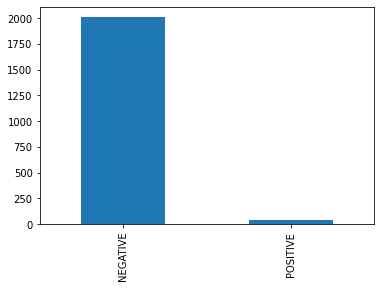

In [ ]:
df.Pipeline_1.value_counts().plot(kind='bar')

In [ ]:
df.Pipeline_1_wE.value_counts()

NEGATIVE    2014
POSITIVE      42
Name: Pipeline_1_wE, dtype: int64

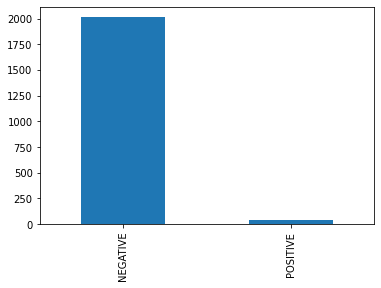

In [ ]:
df.Pipeline_1_wE.value_counts().plot(kind='bar')

### Biblioteca pipiline para análisis de sentimiento multilengua

In [ ]:
sentiment_m = pipeline(task = 'sentiment-analysis',
                     model = 'nlptown/bert-base-multilingual-uncased-sentiment',
                     tokenizer = 'nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
results = sentiment_m('Esto está mal')
results

[{'label': '1 star', 'score': 0.6360455751419067}]

In [ ]:
results[0]['label']

'1 star'

In [ ]:
results = sentiment_m(df['tweet'][13])

In [ ]:
results[0]['label']

'1 star'

In [ ]:
#Aplicamos la función a todos los twits
df['Multi']=df['tweet'].apply(lambda text: sentiment_m(text)) # Sin Emoji

In [ ]:
#Aplicamos la función a todos los twits
df['Multi_wE']=df['tweet_wE'].apply(lambda text: sentiment_m(text)) # Sin Emoji

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,Vader_1,Vader_wE_1,Pipeline,Pipeline_wE,Pipeline_1,Pipeline_1_wE,Multi,Multi_wE,Multi_1,Multi_wE_1
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.983053267002...","[{'label': 'NEGATIVE', 'score': 0.983053267002...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.51152431964874...","[{'label': '1 star', 'score': 0.51152431964874...",1 star,1 star
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.975894093513...","[{'label': 'NEGATIVE', 'score': 0.975894093513...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.64007186889648...","[{'label': '1 star', 'score': 0.64007186889648...",1 star,1 star
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.987163126468...","[{'label': 'NEGATIVE', 'score': 0.988777458667...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.41885539889335...","[{'label': '1 star', 'score': 0.53158450126647...",1 star,1 star
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.993907809257...","[{'label': 'NEGATIVE', 'score': 0.993907809257...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.47126185894012...","[{'label': '1 star', 'score': 0.47126185894012...",1 star,1 star
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.984445035457...","[{'label': 'NEGATIVE', 'score': 0.984445035457...",NEGATIVE,NEGATIVE,"[{'label': '4 stars', 'score': 0.3495238721370...","[{'label': '4 stars', 'score': 0.3495238721370...",4 stars,4 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,https://twitter.com/edrova25/status/1478099180...,2022-01-03 15:21:21-05:00,estupidez gracias protestas reforma tributaria...,1478099180816109573,edrova25,[],NaN,[],NaN,"['@Francis60220940', '@Mafalda_2020_']",...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.983389198780...","[{'label': 'NEGATIVE', 'score': 0.983389198780...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.77106517553329...","[{'label': '1 star', 'score': 0.77106517553329...",1 star,1 star
2052,https://twitter.com/PequeFran/status/147804187...,2022-01-03 11:33:38-05:00,parece insólito q existan voces encuentren rie...,1478041875047137287,PequeFran,[],NaN,[],NaN,"['@r_echecopar', '@cristobalotero']",...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.915252029895...","[{'label': 'NEGATIVE', 'score': 0.915252029895...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.47159841656684...","[{'label': '1 star', 'score': 0.47159841656684...",1 star,1 star
2053,https://twitter.com/carlossGD/status/147801671...,2022-01-03 09:53:39-05:00,solo principio pgu siendo presentado gasto per...,1478016713027244034,carlossGD,[],NaN,[],NaN,"['@michelonater', '@anvolea4']",...,neu,neu,"[{'label': 'NEGATIVE', 'score': 0.975353300571...","[{'label': 'NEGATIVE', 'score': 0.975353300571...",NEGATIVE,NEGATIVE,"[{'label': '1 star', 'score': 0.549980878829956}]","[{'label': '1 star', 'score

In [ ]:
# Se crea función para acceder a la lista
def sentimentWithMulti(a):
  valor=a[0]['label']
  return valor

In [ ]:
#Aplicamos la función a todos los twits

df['Multi_1']=df['Multi'].apply(lambda text: sentimentWithMulti(text))

In [ ]:
#Aplicamos la función a todos los twits

df['Multi_wE_1']=df['Multi_wE'].apply(lambda text: sentimentWithMulti(text))# Sin Emoji

In [ ]:
df.Multi_1.value_counts()

1 star     1481
5 stars     209
3 stars     177
4 stars     169
2 stars      20
Name: Multi_1, dtype: int64

In [ ]:
df.Multi_wE_1.value_counts()

1 star     1496
5 stars     195
3 stars     183
4 stars     160
2 stars      22
Name: Multi_wE_1, dtype: int64

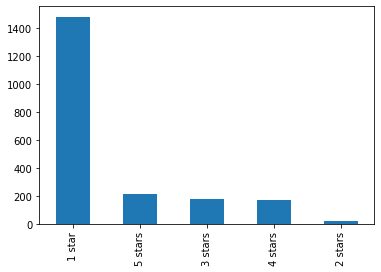

In [ ]:
df.Multi_1.value_counts().plot(kind='bar')

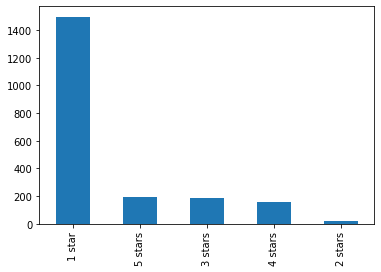

In [ ]:
df.Multi_wE_1.value_counts().plot(kind='bar')

In [ ]:
one_star = df[df['Multi_1']=='1 star']['tweet']
one_star

0       si nueva reforma tributaria peor carrasquilla ...
1       estimado reforma tributaria solo proyecto debe...
2       aprobar reforma tributaria importante q van ga...
3       reforma tributaria deficiente tasa patrimonio ...
5       nueva reforma tributaria gente familia si dine...
                              ...                        
2051    estupidez gracias protestas reforma tributaria...
2052    parece insólito q existan voces encuentren rie...
2053    solo principio pgu siendo presentado gasto per...
2054    si bloqueos huevos unidad pagando impuestos re...
2055    mentirosa mierda corrupta siempre comunista mi...
Name: tweet, Length: 1481, dtype: object

In [ ]:
five_star = df[df['Multi_1']=='5 stars']['tweet']
five_star

22                         mejor reforma tributaria salga
24      reforma tributaria retroceso objetivos simplic...
35      señora vive australia graven aumenten impuesto...
38      mejor reforma tributaria bajar iva canasta fam...
55      “la realidad país gran preocupación nivel fisc...
                              ...                        
2013    “la mejor reforma tributaria sacar ladrones go...
2014    ahora “la reforma tributaria equilibrada apela...
2027    esperar primer gabinete boric mario marcel ahí...
2028    esperar primer gabinete boric mario marcel ahí...
2033    encantaría ver formularios impuesto renta dice...
Name: tweet, Length: 209, dtype: object

# Modelos entrenados en español

In [ ]:
sentiment_pipeline = pipeline('text-classification', 
                              model="pysentimiento/robertuito-sentiment-analysis")

In [ ]:
results = sentiment_pipeline('Golpear a los niños no esta bien')
results

[{'label': 'NEG', 'score': 0.9986055493354797}]

In [ ]:
#Aplicamos la función a todos los twits
df['Spanish']=df['tweet'].apply(lambda text: sentiment_pipeline(text)) # Sin Emoji

In [ ]:
df.head(5)

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Spanish
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],[],si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","[{'label': 'NEG', 'score': 0.9099056124687195}]"
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",[],estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","[{'label': 'NEU', 'score': 0.564820408821106}]"
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],[],aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"['aprobar', 'reforma', 'tributaria', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","[{'label': 'NEG', 'score': 0.9959704875946045}]"
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],[],reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","[{'label': 'NEG', 'score': 0.5374675393104553}]"
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],[],reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","[{'label': 'NEU', 'score': 0.8705793023109436}]"


In [ ]:
#Aplicamos la función a todos los twits
df['Spanish_wE']=df['tweet_wE'].apply(lambda text: sentiment_pipeline(text)) # Con Emoji

In [ ]:
# Se crea función para acceder a la lista
def sentimentWithSpanish(a):
  valor=a[0]['label']
  return valor

In [ ]:
#Aplicamos la función a todos los twits

df['Spanish_1']=df['Spanish'].apply(lambda text: sentimentWithSpanish(text))

In [ ]:
#Aplicamos la función a todos los twits

df['Spanish_wE_1']=df['Spanish_wE'].apply(lambda text: sentimentWithSpanish(text))

In [ ]:
df.Spanish_1.value_counts()

NEG    1067
NEU     982
POS       7
Name: Spanish_1, dtype: int64

In [ ]:
df.Spanish_wE_1.value_counts()

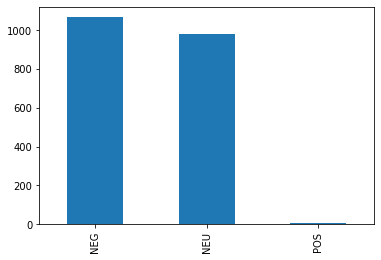

In [ ]:
df.Spanish_1.value_counts().plot(kind='bar')

In [ ]:
df.Spanish_wE_1.value_counts().plot(kind='bar')

In [ ]:
df.head(5)

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,...,tweet,tweet_wE,tokens,tokens_wE,tokens_clean,tokens_clean_wE,lemmas,lemmas_wE,Spanish,Spanish_1
0,https://twitter.com/pangel1960/status/15560317...,2022-08-06 16:37:41-05:00,si nueva reforma tributaria peor carrasquilla ...,1556031784583921668,pangel1960,[],NaN,[],NaN,['@wilsonariasc'],...,si nueva reforma tributaria peor carrasquilla ...,si nueva reforma tributaria peor carrasquilla ...,"['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nueva', 'reforma', 'tributaria', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","['si', 'nuevo', 'reforma', 'tributario', 'peor...","[{'label': 'NEG', 'score': 0.9099056124687195}]",NEG
1,https://twitter.com/Denise_Retamal/status/1555...,2022-08-06 13:23:46-05:00,estimado reforma tributaria solo proyecto debe...,1555982983286312960,Denise_Retamal,[],NaN,[],NaN,"['@futbolsur11', '@Canilemo', '@_alvaromunoz']",...,estimado reforma tributaria solo proyecto debe...,estimado reforma tributaria solo proyecto debe...,"['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributaria', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","['estimado', 'reforma', 'tributario', 'solo', ...","[{'label': 'NEU', 'score': 0.564820408821106}]",NEU
2,https://twitter.com/m_s_e_r/status/15559184298...,2022-08-06 09:07:15-05:00,🤔 aprobar reforma tributaria importante q van ...,1555918429852274688,m_s_e_r,['https://twitter.com/latercera/status/1555904...,https://twitter.com/latercera/status/155590401...,['https://t.co/sWD5ZK44Is'],https://t.co/sWD5ZK44Is,[],...,aprobar reforma tributaria importante q van ga...,:cara_pensativa: aprobar reforma tributaria im...,"['aprobar', 'reforma', 'tributaria', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributaria', 'importan...","['aprobar', 'reforma', 'tributario', 'importan...","[':', 'cara_pensativa', ':', 'aprobar', 'refor...","[{'label': 'NEG', 'score': 0.9959704875946045}]",NEG
3,https://twitter.com/FDuber/status/155591063550...,2022-08-06 08:36:17-05:00,reforma tributaria deficiente tasa patrimonio ...,1555910635501678592,FDuber,[],NaN,[],NaN,['@juanfcosanchezs'],...,reforma tributaria deficiente tasa patrimonio ...,reforma tributaria deficiente tasa patrimonio ...,"['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributaria', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","['reforma', 'tributario', 'deficiente', 'tasa'...","[{'label': 'NEG', 'score': 0.5374675393104553}]",NEG
4,https://twitter.com/EduardoDvila12/status/1555...,2022-08-06 05:43:44-05:00,reforma tributaria buen dinero preocupa usted ...,1555867210991763457,EduardoDvila12,[],NaN,[],NaN,['@lcvelez'],...,reforma tributaria buen dinero preocupa usted ...,reforma tributaria buen dinero preocupa usted ...,"['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributaria', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","['reforma', 'tributario', 'buen', 'dinero', 'p...","[{'label': 'NEU', 'score': 0.8705793023109436}]",NEU


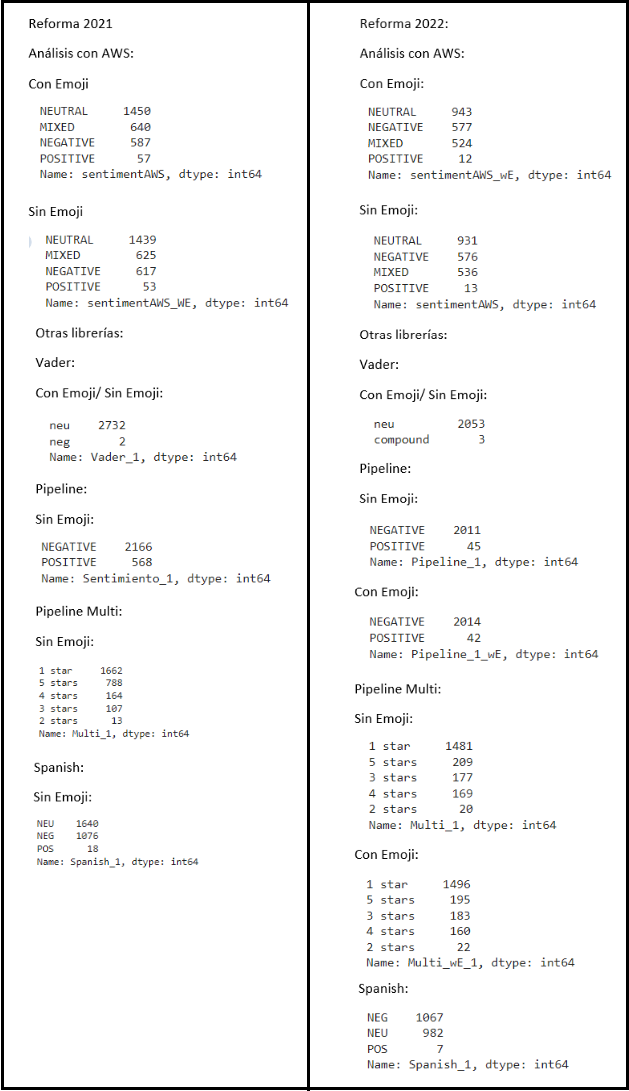

# Comentarios:
Realizando un análisis de sentimientos a partir de la red social Twitter, de la reforma planteada por el gobieron nacional en 2021 y la planteada actualmente en 2022.

##Con respecto a las dos reformas:

Se evidencia que la reforma del 2022 tiene menos comentarios positivos que la del 2021, que adicional, algunos de los comentarios positivos de la reforma 2021 son sarcásticos, por lo que se hace mas complejo su identificación. 


##Con respecto a la metodología y diferentes librerías:

Al realizar el análisis con Emojis y sin Emojis, realmente no es mucha la diferencia, sin embargo se obtienen mejores resultados sin Emojis, debido a que el texto que incluyen los Emojis en ocasiones dificulta la identificación y un comentario que era negativo o positivo, podia pasar a neutro o mixed.

Entre las librerías y AWS, se considera que hubo mejor resultado con AWS, que aunque predomina mucho los neutral y mixed siendo muchas veces negativos, tiene buena acertividad con los positivos. 
En segunda instancia la mejor librería es Pipeline, sin embargo al ser tan rádical y no tener una opción neutra, puede sesgar los análisis, aunque para estos casos aquellos comentarios sarcasticos son los que en ocasiones quedan en evaluación positiva. 
